In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter

In [2]:
df_hierro = pd.read_csv('data/el_hierro_16_18.csv', parse_dates=['datetime'])
df_hierro.head()

,datetime,demand,diesel,wind,hydro
0,2016-01-01 00:00:00,5.1,5.2,0.0,0.0
1,2016-01-01 00:10:00,5.1,5.2,0.0,0.0
2,2016-01-01 00:20:00,5.3,5.4,0.0,0.0
3,2016-01-01 00:30:00,5.3,5.4,0.0,0.0
4,2016-01-01 00:40:00,5.3,5.4,0.0,0.0


In [3]:
df_hierro_ovw = pd.read_csv('data/df_hierro_clean.csv', parse_dates=['datetime']).set_index('datetime')

for year in ['2016', '2017', '2018']:
    s_makeup = 100*df_hierro_ovw[year].drop(columns=['pump_hydro', 'demand']).sum()/df_hierro_ovw[year].drop(columns=['pump_hydro', 'demand']).sum().sum()
    print(f'{year}:\n{s_makeup}\n')

2016:
diesel        45.754109
wind          50.566970
dsch_hydro     3.678921
dtype: float64

2017:
diesel        41.294207
wind          53.977634
dsch_hydro     4.728159
dtype: float64

2018:
diesel        34.059403
wind          61.788346
dsch_hydro     4.152251
dtype: float64



In [4]:
s_dates = df_hierro.datetime.dt.date.unique()
s_times = df_hierro.datetime.dt.time.unique()

df_datetime = pd.DataFrame(columns=s_times)

for _date in s_dates:
    df_hierro_date = df_hierro[df_hierro.datetime.dt.date==_date].copy()
    for _time in s_times:
        df_hierro_time = df_hierro_date[df_hierro_date.datetime.dt.time==_time].copy()
        
        if df_hierro_time.shape[0] == 1:
            df_datetime.at[_date, _time] = df_hierro_time.reset_index().loc[0, 'demand']
        
        elif df_hierro_time.shape[0] > 1:
            print('More than one', _date, _time)
            df_datetime.at[_date, _time] = df_hierro_time.reset_index().loc[0, 'demand']
        
        elif df_hierro_time.shape[0] == 0:
            print('No values', _date, _time)

No values 2016-03-27 01:00:00
No values 2016-03-27 01:10:00
No values 2016-03-27 01:20:00
No values 2016-03-27 01:30:00
No values 2016-03-27 01:40:00
No values 2016-03-27 01:50:00
No values 2016-06-02 12:10:00
No values 2016-06-02 13:10:00
No values 2016-10-30 01:00:00
No values 2016-10-30 01:10:00
No values 2016-10-30 01:20:00
No values 2016-10-30 01:30:00
No values 2016-10-30 01:40:00
No values 2016-10-30 01:50:00
More than one 2016-10-30 10:00:00
More than one 2016-10-30 10:10:00
More than one 2016-10-30 10:20:00
More than one 2016-10-30 10:30:00
More than one 2016-10-30 10:40:00
More than one 2016-10-30 10:50:00
No values 2017-03-09 06:50:00
No values 2017-03-26 01:00:00
No values 2017-03-26 01:10:00
No values 2017-03-26 01:20:00
No values 2017-03-26 01:30:00
No values 2017-03-26 01:40:00
No values 2017-03-26 01:50:00
No values 2017-10-29 01:00:00
No values 2017-10-29 01:10:00
No values 2017-10-29 01:20:00
No values 2017-10-29 01:30:00
No values 2017-10-29 01:40:00
No values 2017-1

In [5]:
df_datetime.index

Index([2016-01-01, 2016-01-02, 2016-01-03, 2016-01-04, 2016-01-05, 2016-01-06,
       2016-01-07, 2016-01-08, 2016-01-09, 2016-01-10,
       ...
       2018-12-22, 2018-12-23, 2018-12-24, 2018-12-25, 2018-12-26, 2018-12-27,
       2018-12-28, 2018-12-29, 2018-12-30, 2018-12-31],
      dtype='object', length=1096)

In [6]:
df_datetime = df_datetime[df_datetime.columns].astype(float)

In [8]:
df_datetime.head()

,00:00:00,00:10:00,00:20:00,00:30:00,00:40:00,00:50:00,01:00:00,01:10:00,01:20:00,01:30:00,...,22:20:00,22:30:00,22:40:00,22:50:00,23:00:00,23:10:00,23:20:00,23:30:00,23:40:00,23:50:00
2016-01-01,5.1,5.1,5.3,5.3,5.3,5.3,5.3,5.0,5.2,5.1,...,5.5,5.3,5.3,5.3,5.2,4.9,5.0,4.6,4.6,4.6
2016-01-02,4.7,4.5,4.4,4.4,4.5,4.6,4.4,4.3,4.4,4.3,...,5.7,5.7,5.7,5.6,5.4,5.2,5.2,5.2,5.0,4.8
2016-01-03,4.9,4.9,4.8,4.5,4.6,4.5,4.6,4.6,4.4,4.4,...,5.4,5.4,5.1,5.1,5.0,4.6,4.9,4.6,4.7,4.6
2016-01-04,4.5,4.4,4.4,4.3,4.3,4.4,4.2,4.0,4.0,4.1,...,5.7,5.8,5.4,5.3,5.1,5.2,5.1,5.1,5.0,4.9
2016-01-05,4.8,4.7,4.8,4.4,4.6,4.4,4.2,4.1,4.2,4.2,...,5.7,5.6,5.5,5.3,5.1,5.1,5.3,5.5,5.0,4.9


In [17]:
s_bool_2018 = pd.to_datetime(df_datetime.index).year==2018
s_bool_2018

array([False, False, False, ...,  True,  True,  True])

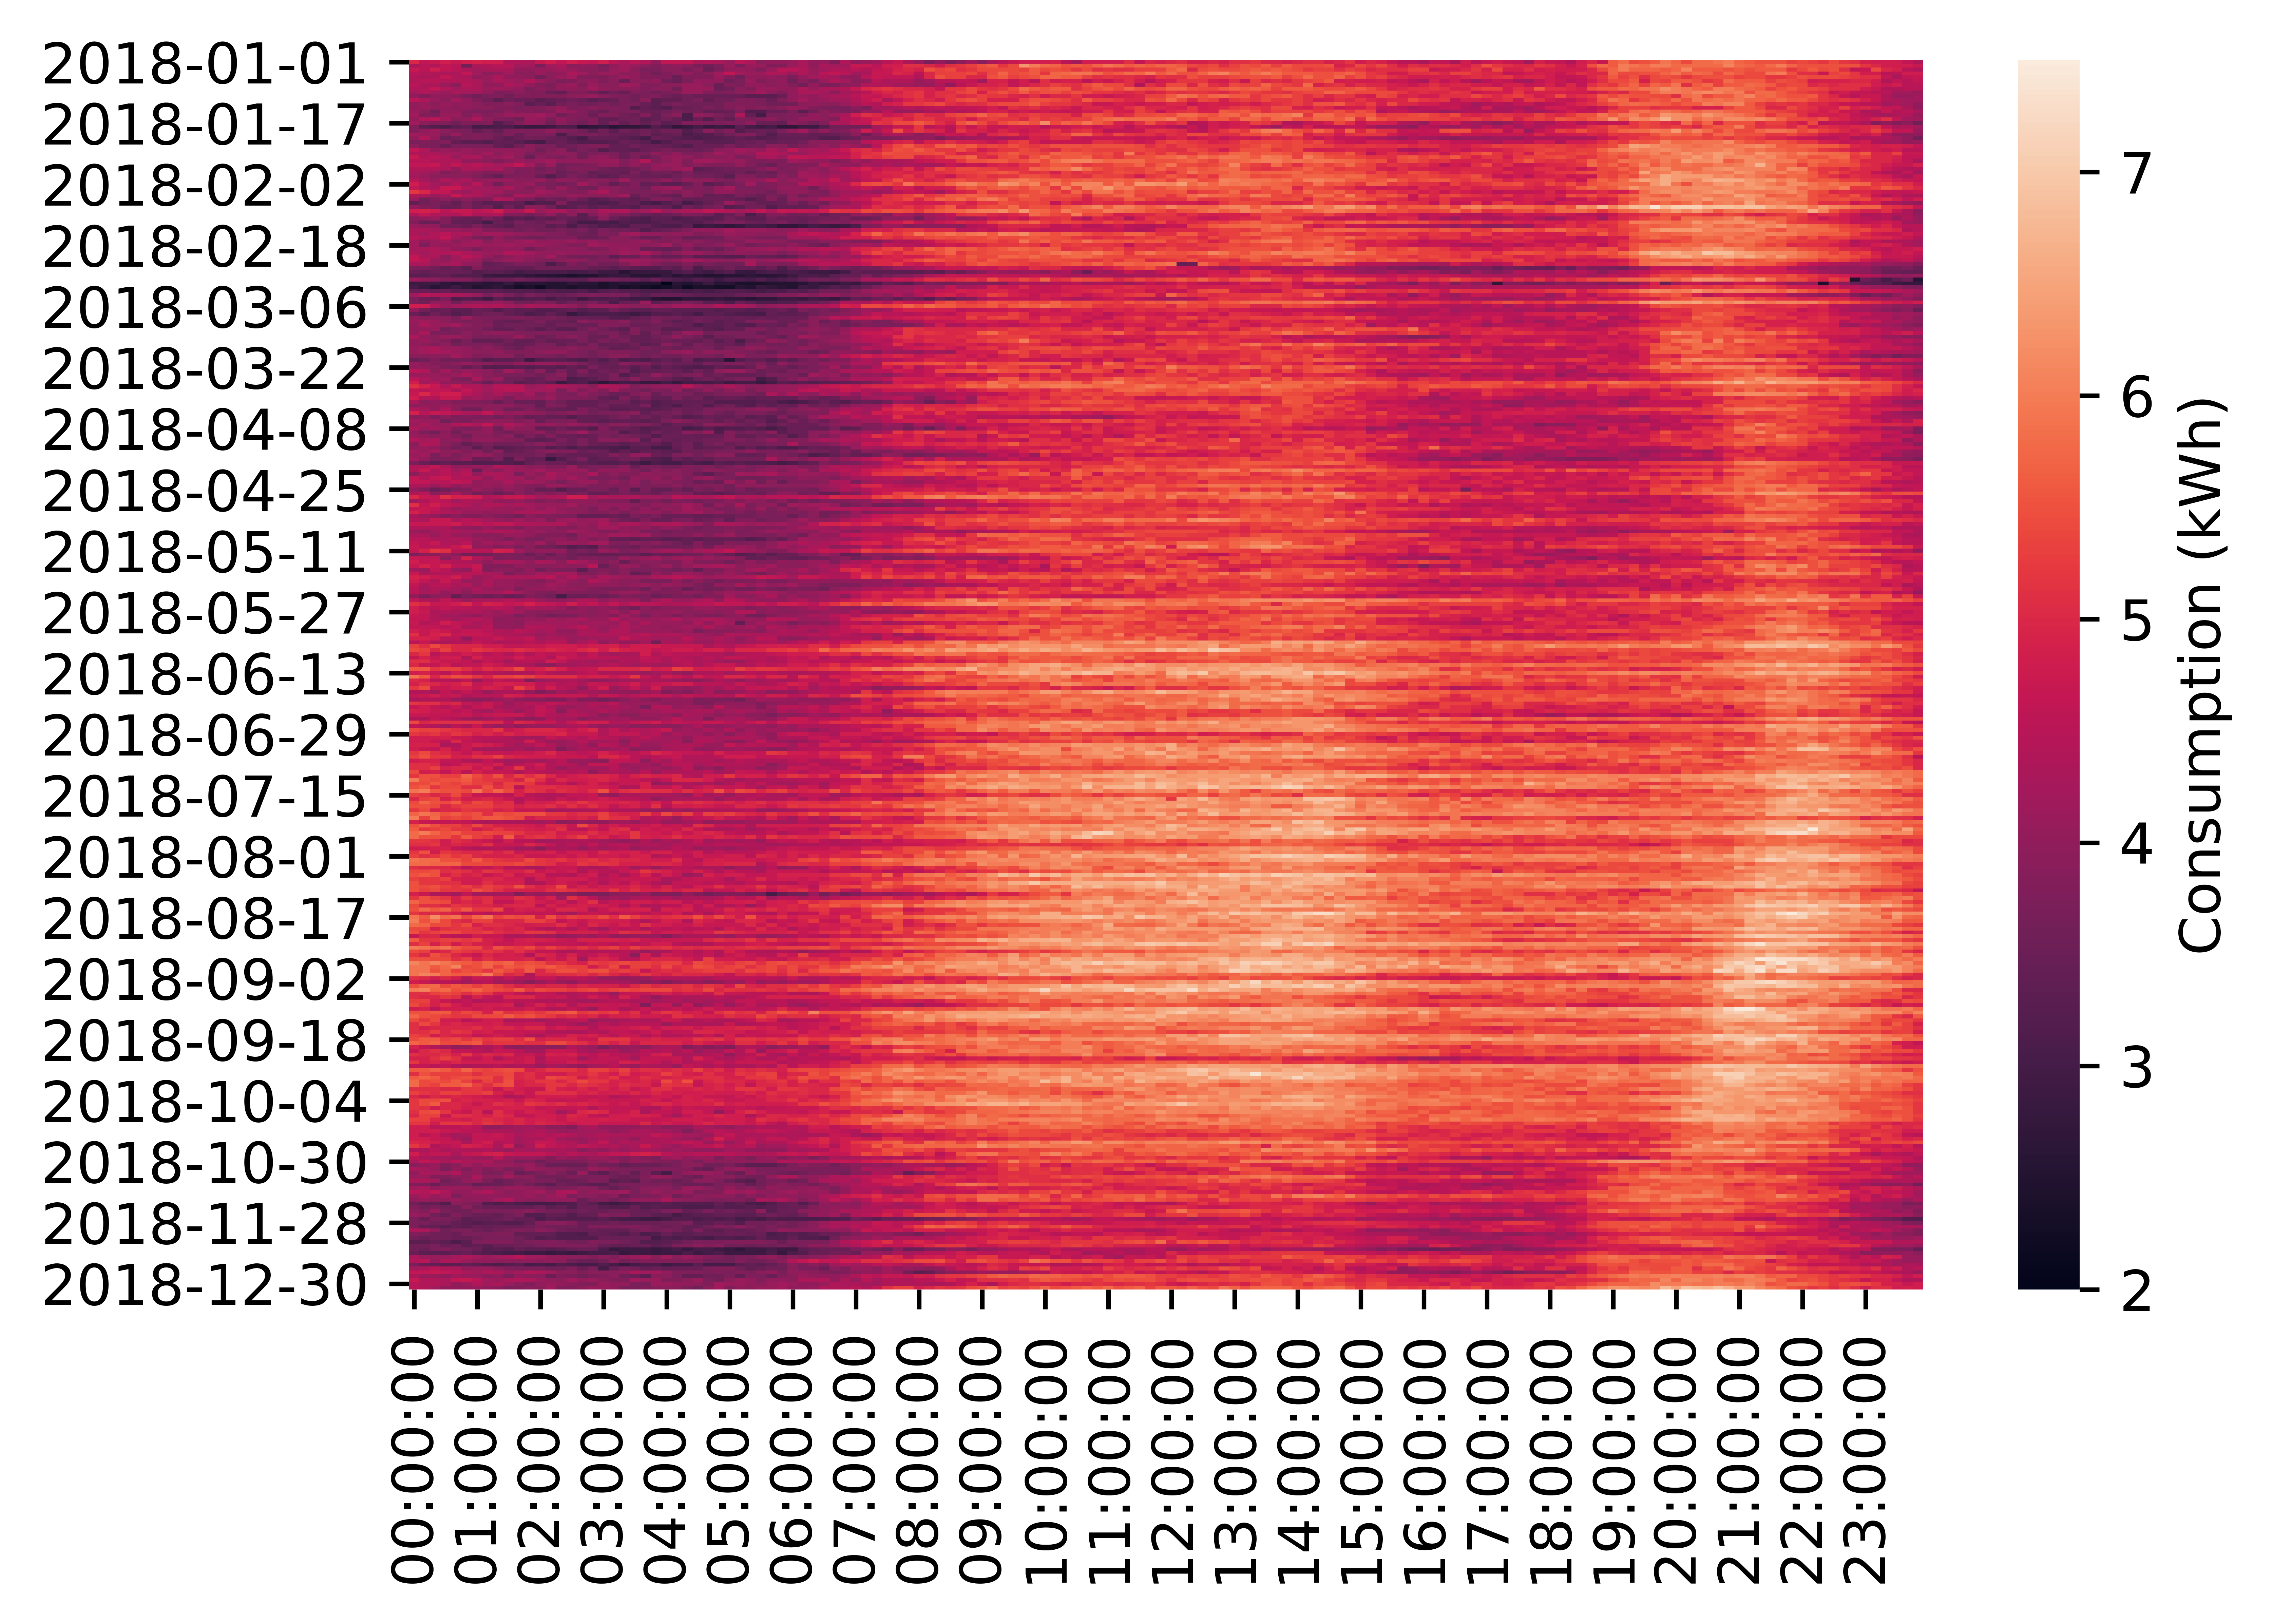

In [18]:
fig = plt.figure(dpi=150)
ax = plt.subplot()

sns.heatmap(df_datetime[s_bool_2018].dropna(), cbar_kws={'label': 'Consumption (kWh)'}, ax=ax, )

#ax.set_yticks(xtickslocs[1::2]*8-15)
#ax.set_yticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#ax.set_ylabel('2018')

#ax.set_xticklabels(time_list)

#ax.set_title('Central House Electricity Usage')

In [20]:
def get_yticks(ax, _print=False):
    ytickslocs = ax.get_yticks()

    ymin = 0
    ymax = int(ytickslocs.max())
    yticks = np.array(list(range(ymin, ymax, int((ymax-ymin)/(12))))) + 15

    if _print == True:
        print(f'Number of y ticks: {len(yticks)}')
    
    return yticks

ytickslocs = get_yticks(ax)
ytickslocs

array([ 15,  41,  67,  93, 119, 145, 171, 197, 223, 249, 275, 301, 327])

In [21]:
yticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [22]:
xtickslocs = ax.get_xticks().astype(int)
xtickslocs

array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138])

In [23]:
time_list = []
for i in range(24):
    _str = str(i)
    if i<10:
        _str = '0' + _str
    
    time_list.append(_str)
    
xticklabels = np.array(time_list)
xticklabels

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype='<U2')

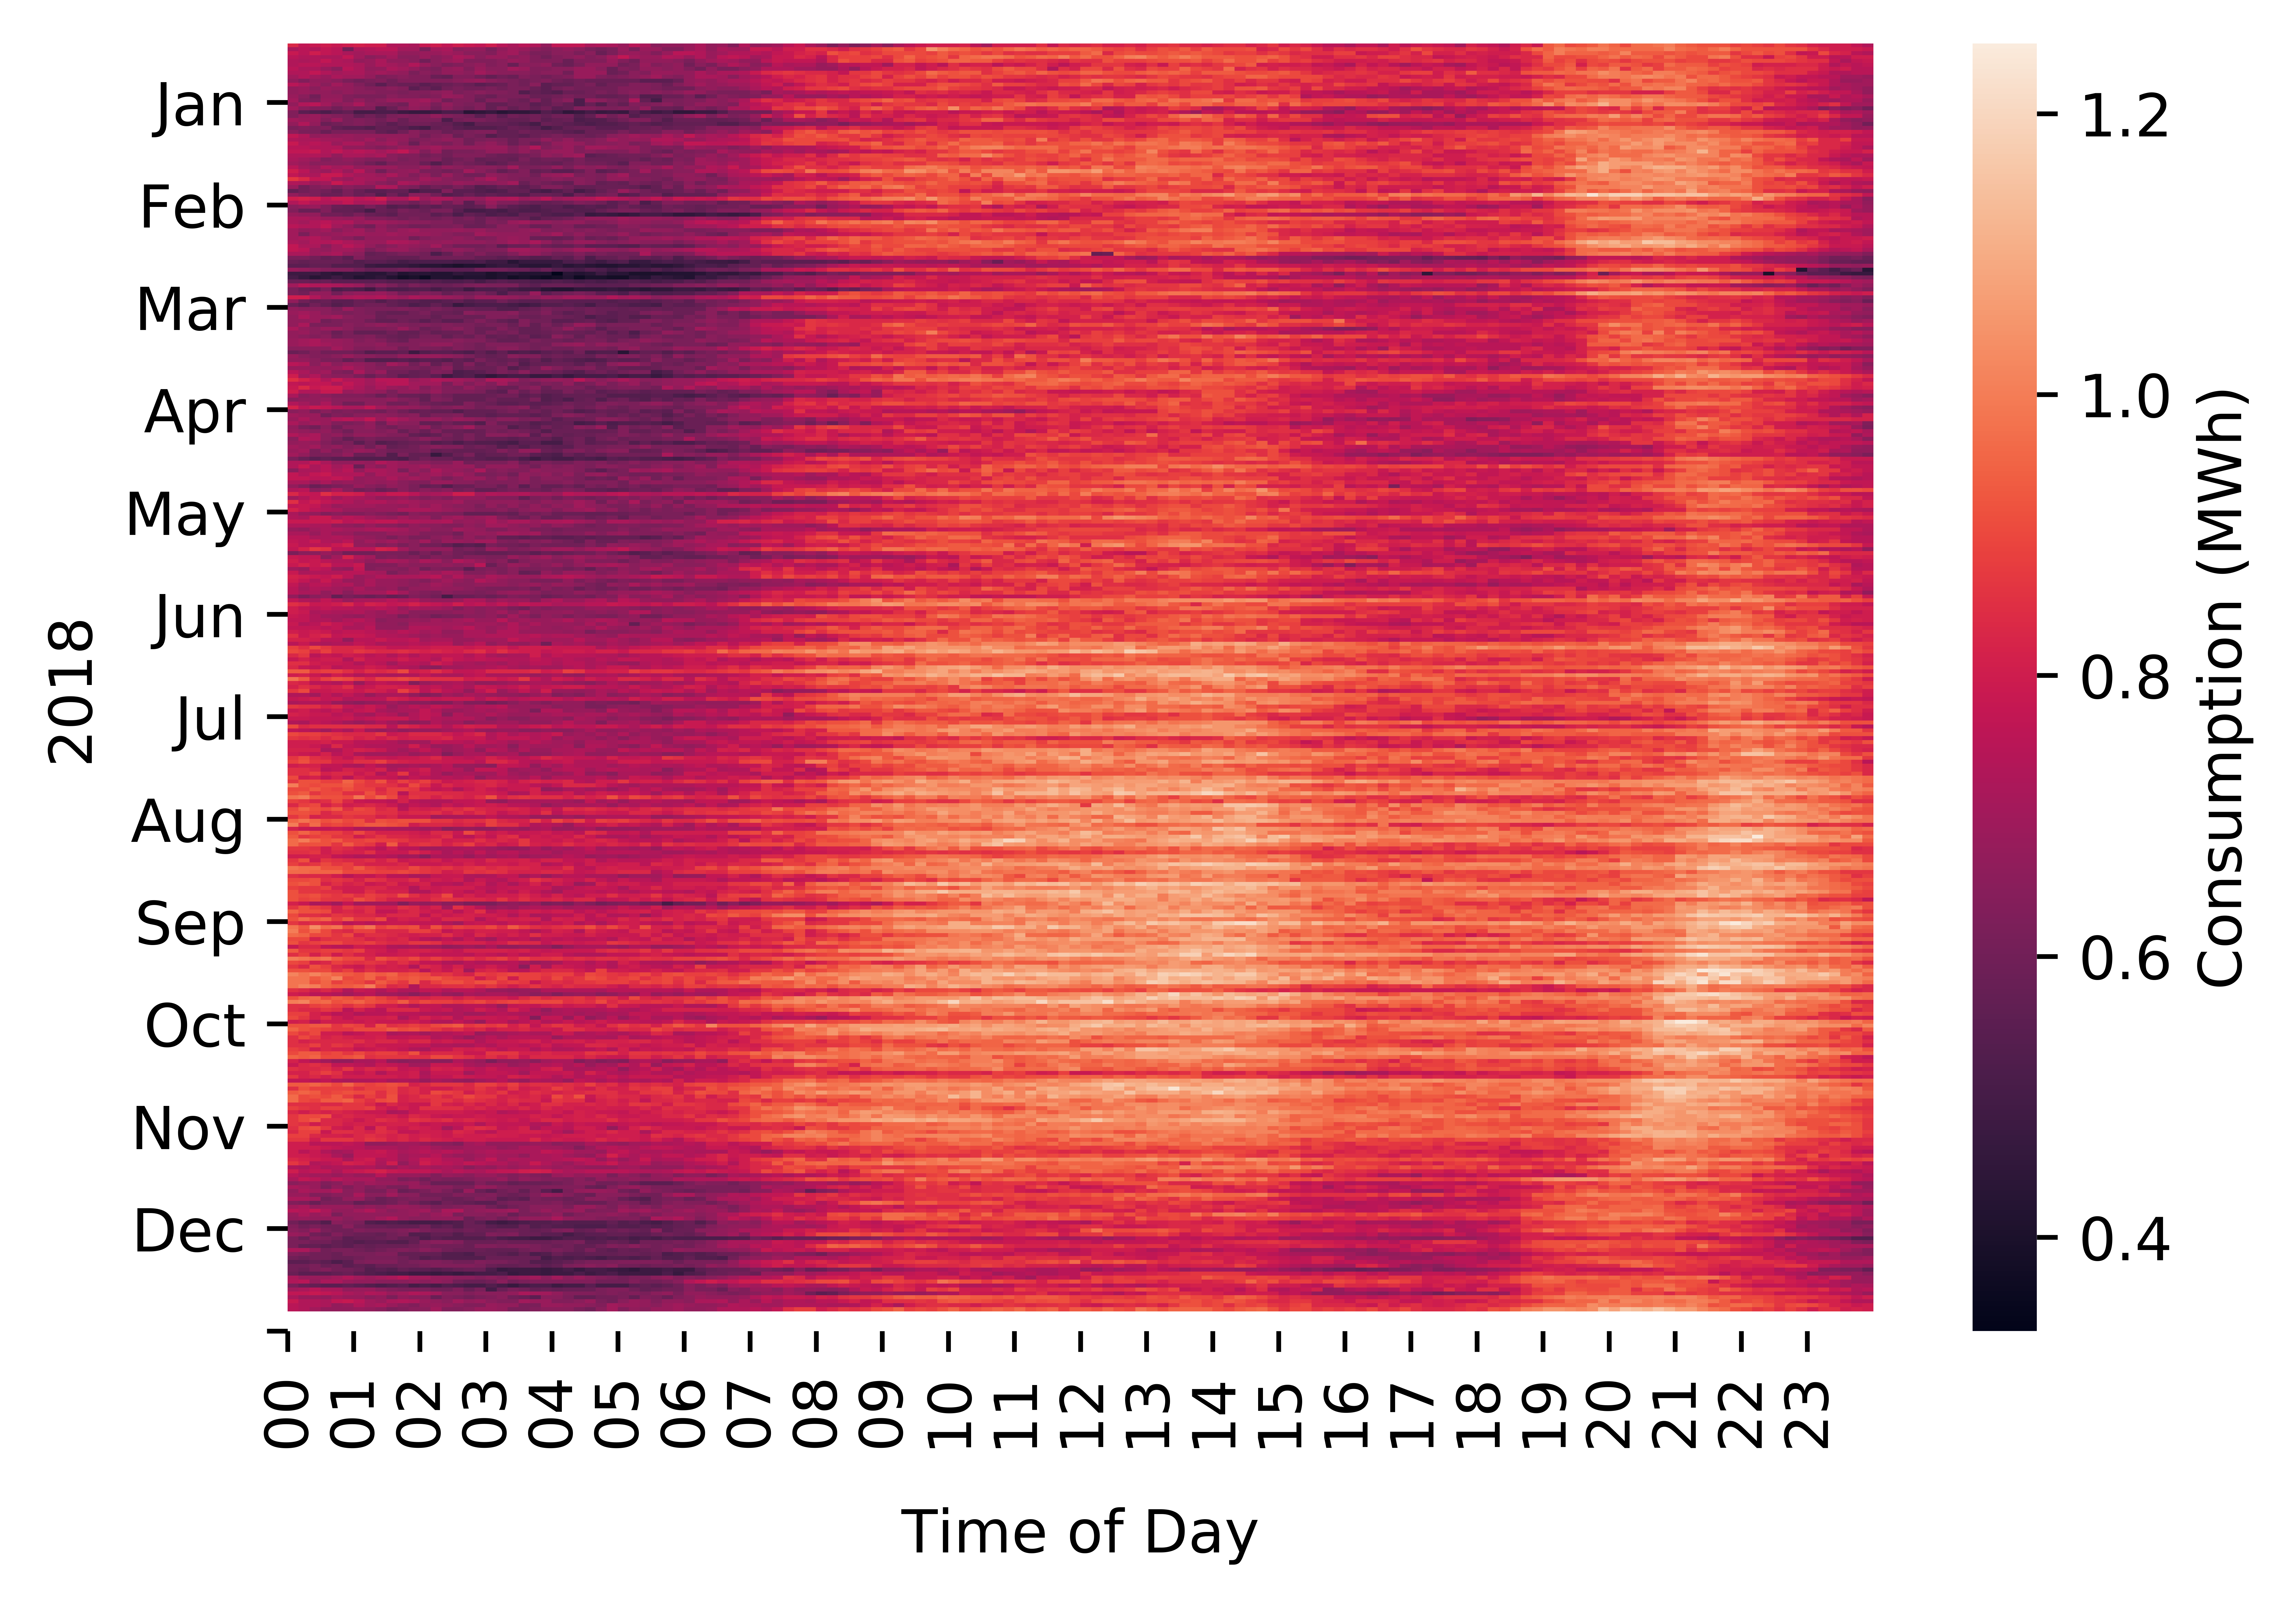

In [32]:
fig = plt.figure(dpi=1500)
ax = plt.subplot()

sns.heatmap(df_datetime[s_bool_2018].dropna()/6, cbar_kws={'label': 'Consumption (MWh)'}, ax=ax)

ax.set_yticks(ytickslocs)
ax.set_yticklabels(yticklabels)
ax.set_ylabel('2018')

ax.set_xticks(xtickslocs)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Time of Day', labelpad=10)

plt.savefig('img/2018_heatmap.png', bbox_inches='tight')